## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.spatial.distance import cdist 

In [2]:
df = pd.read_excel("E:\ExcelR Assignment\Assignment 7 - Clustering\EastWestAirlines.xlsx",'data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


#### Rename 2 columns as they have a special character attahed to it.

In [4]:
df= df.rename(columns={'ID#':'ID', 'Award?':'Award'})
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df = df.drop(['ID'],axis=1)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


## EDA

In [6]:
df.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

#### No missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [8]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:>

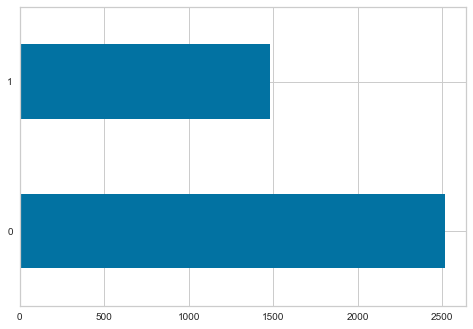

In [9]:
df['Award'].value_counts().plot(kind='barh',grid=True)

In [10]:
df['cc1_miles'].value_counts()

1    2289
3     613
4     525
5     288
2     284
Name: cc1_miles, dtype: int64

<AxesSubplot:ylabel='cc1_miles'>

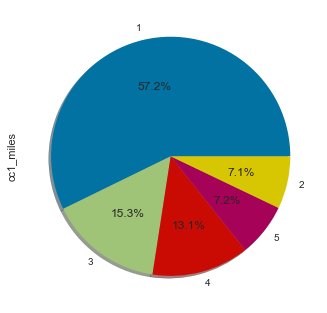

In [11]:
df['cc1_miles'].value_counts().plot(kind='pie',autopct="%.1f%%",shadow=True)

In [12]:
df['cc2_miles'].value_counts()

1    3956
2      28
3      15
Name: cc2_miles, dtype: int64

<AxesSubplot:>

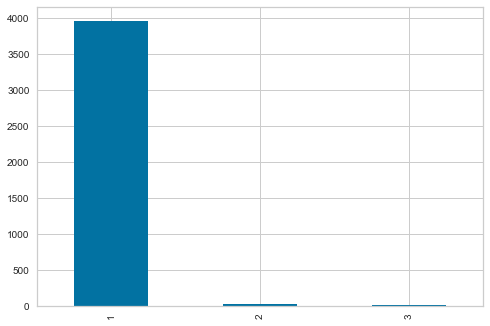

In [13]:
df['cc2_miles'].value_counts().plot(kind='bar')

In [14]:
df['cc3_miles'].value_counts()

1    3981
4       6
5       5
3       4
2       3
Name: cc3_miles, dtype: int64

<AxesSubplot:>

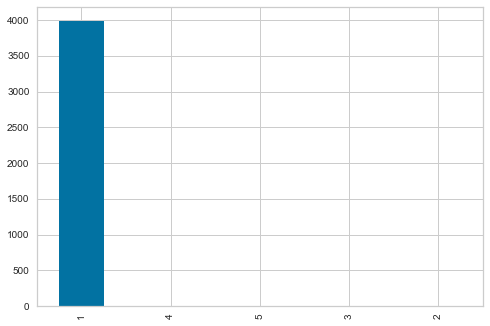

In [15]:
df['cc3_miles'].value_counts().plot(kind='bar')

### Inferences:
1. Passenger with freq. flyer credit card, Rewards credit card, Small Business card all have category 1.
1. Freq. Flyer Credit Card & Small Business card is used by 5 categories people
2. Rewards Credit Card is used by only 3 category people
3. Of the 3 segments of card, category 1 has the maximum crowd who are under 5000.

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

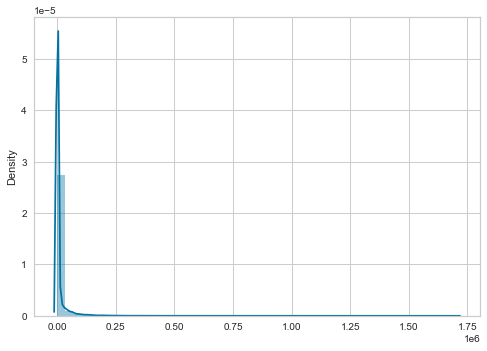

In [16]:
sns.distplot(df)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

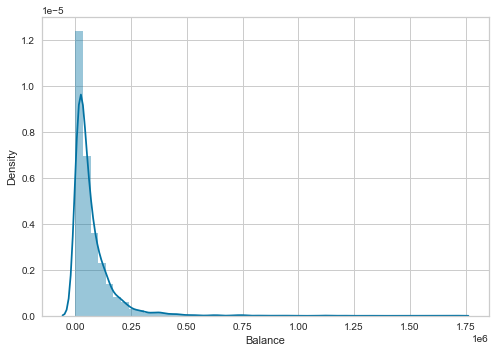

In [17]:
sns.distplot(df['Balance'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days_since_enroll', ylabel='Density'>

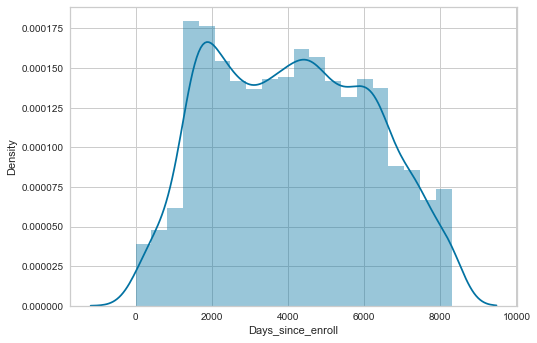

In [18]:
sns.distplot(df['Days_since_enroll'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

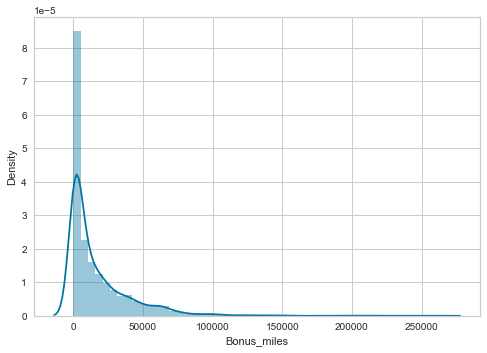

In [19]:
sns.distplot(df['Bonus_miles'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_trans', ylabel='Density'>

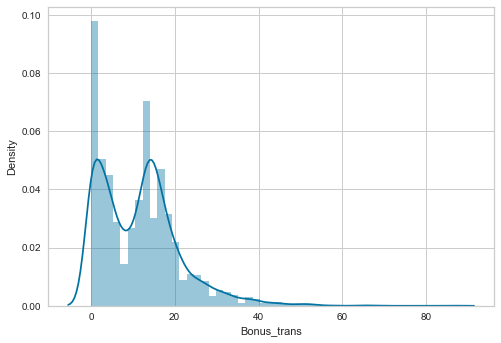

In [20]:
sns.distplot(df['Bonus_trans'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_miles_12mo', ylabel='Density'>

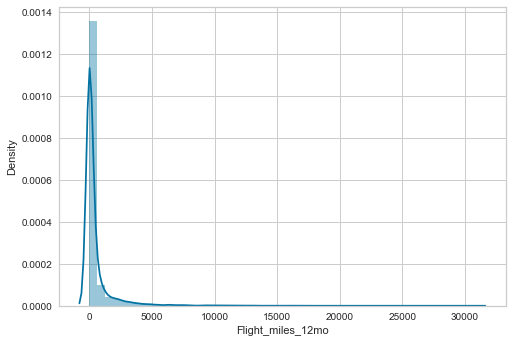

In [21]:
sns.distplot(df['Flight_miles_12mo'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_trans_12', ylabel='Density'>

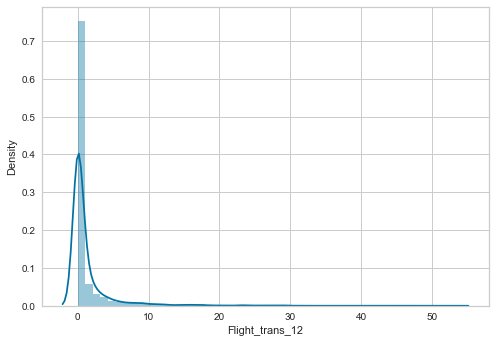

In [22]:
sns.distplot(df['Flight_trans_12'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Qual_miles', ylabel='Density'>

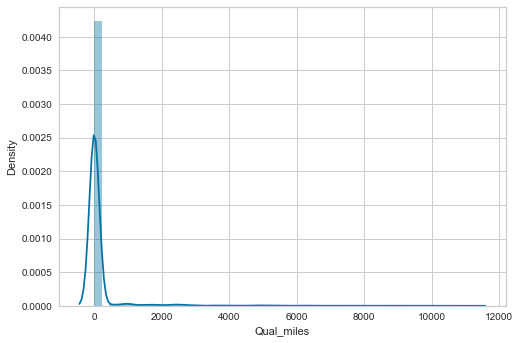

In [23]:
sns.distplot(df['Qual_miles'])

## Inferences:

1. Most of the data is Right Skewed
2. Data needs to be transformed inorder to normalize the data around

<AxesSubplot:>

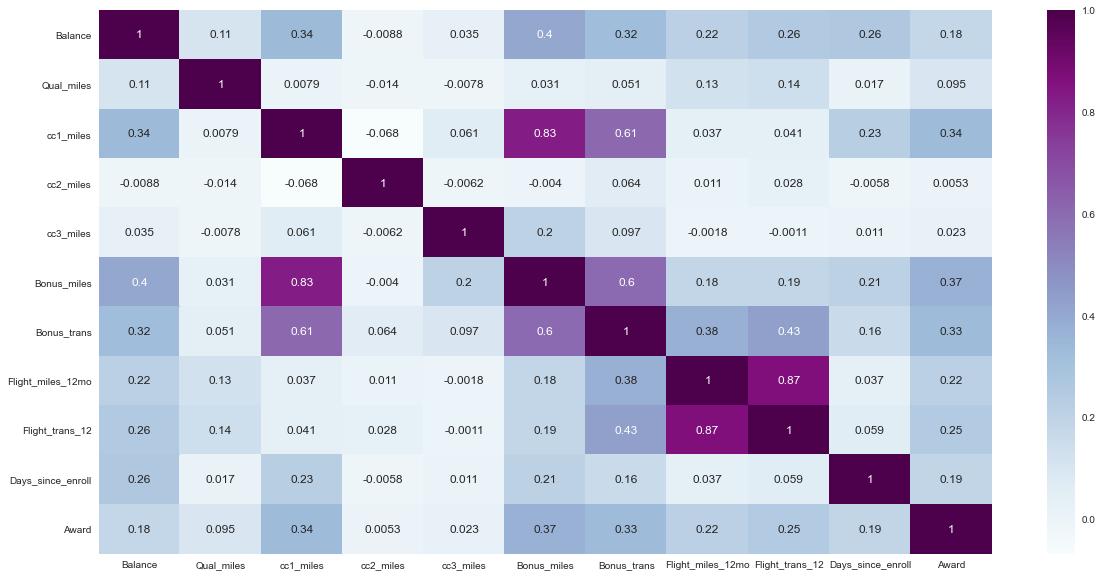

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='BuPu')

### Inferences:

1. None of the data is highly Correlated
2. Positive Correlations:
    1. Bonus_miles vs cc1_miles [Good]
    2. Flight_miles_12mo vs Flight_trans_12 [Good]
    3. Bonus_miles vs Bonus_trans  [Moderate]
    4. Bonus_miles vs Balance  [Moderate]
    5. Bonus_trans vs cc1_miles  [Moderate]

### In this Problem we will analyze with Standardization and Normalization of data

## Normalization

In [25]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [26]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
ndf = norm_func(df)

In [28]:
ndf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

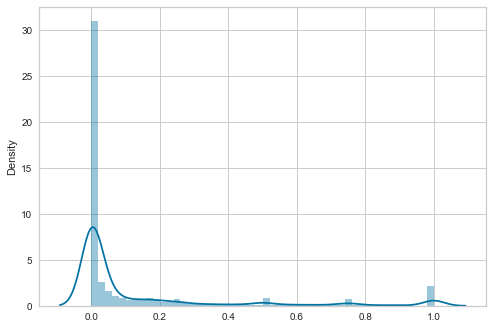

In [29]:
sns.distplot(ndf)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

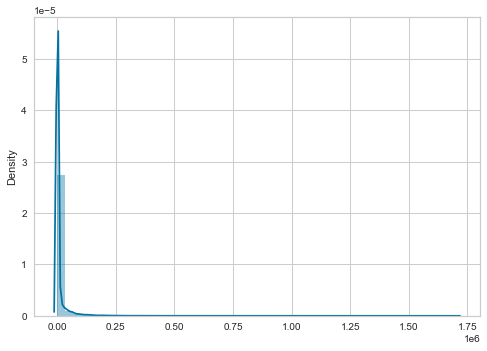

In [30]:
sns.distplot(df)

#### Compared to original df, normalized df has lesser skewness

## Standardization

In [31]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [32]:
sdf = stand_func(df)
sdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

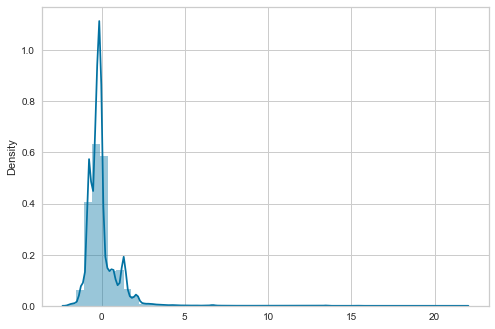

In [33]:
sns.distplot(sdf)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

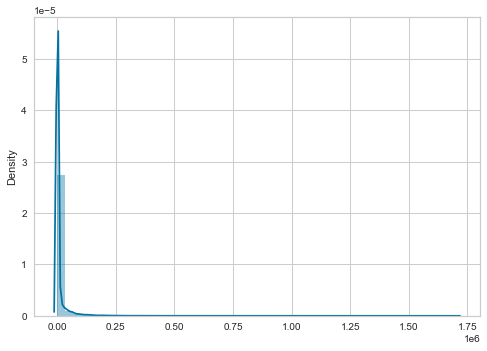

In [34]:
sns.distplot(df)

#### Compared to original df, Standardized df looks less skewness

### Converting Transformed Data from Array into DataFrame

#### Transformed Normalized data into DataFrame

In [35]:
fndf = pd.DataFrame(data=ndf,columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award'])
fndf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


#### Transformed Standardized data into DataFrame

In [36]:
fsdf = pd.DataFrame(data=sdf,columns=['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award'])
fsdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


## PCA on Transformed data

### 1. PCA on Normalized Data

In [37]:
pca_norm = PCA(random_state=42, n_components=0.95)
pca_norm_df= pca_norm.fit_transform(fndf)

In [38]:
print(pca_norm.explained_variance_ratio_*100)

[58.10867135 22.69398556 12.20975906  2.34451208]


In [39]:
cum_nvariance = np.cumsum(pca_norm.explained_variance_ratio_*100)
cum_nvariance

array([58.10867135, 80.80265691, 93.01241597, 95.35692805])

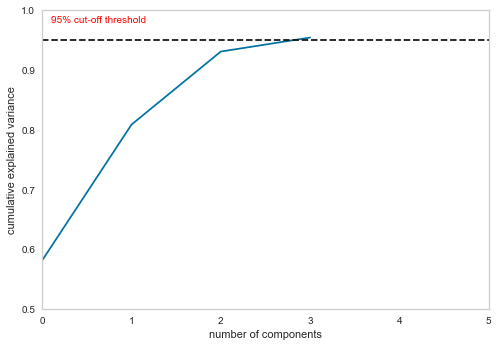

In [40]:
plt.plot(np.cumsum(pca_norm.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylim(0.5,1)
plt.xlim(0.0,5)
plt.axhline(y=0.95, color='k', linestyle='--')
plt.text(0.1, 0.98, '95% cut-off threshold', color = 'red', fontsize=10)
plt.ylabel('cumulative explained variance')
plt.grid()

#### Here we get idea that PCA Components should be 3, however still we can analyze to get 95 % of variance

### I. DBSCAN on PCA of Normalized Data

In [41]:
pcanorm = pd.DataFrame(pca_norm_df,columns=['pca1','pca2','pca3','pca4'])
pcanorm.head()

,pca1,pca2,pca3,pca4
0,-0.407742,-0.020574,0.421877,-0.058577
1,-0.407213,-0.019828,0.417400,-0.051175
2,-0.401681,-0.011528,0.423673,-0.031022
3,-0.408691,-0.021903,0.415954,-0.059589
4,0.833653,0.240266,0.176760,0.053496


In [42]:
dbscan_norm = DBSCAN(eps=0.7,min_samples=12)
dbscan_norm.fit(pcanorm)

DBSCAN(eps=0.7, min_samples=12)

In [43]:
dbcluster_norm = pd.DataFrame(dbscan_norm.labels_,columns=['DBSCAN_Cluster'])
dbcluster_norm.head()

,DBSCAN_Cluster
0,0
1,0
2,0
3,0
4,1


In [44]:
dfnorm = pd.concat([df,dbcluster_norm],axis=1)
dfnorm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [45]:
dbnorm=dbscan_norm.labels_

In [46]:
dfnorm['DBSCAN_Cluster'].value_counts()

0    2518
1    1481
Name: DBSCAN_Cluster, dtype: int64

In [47]:
silhouette_score(pcanorm,dbnorm)

0.5570574742349605

In [48]:
plt.style.use('classic')

Text(0.5, 1.0, 'Clustering using DBSCAN on Normalized Data')

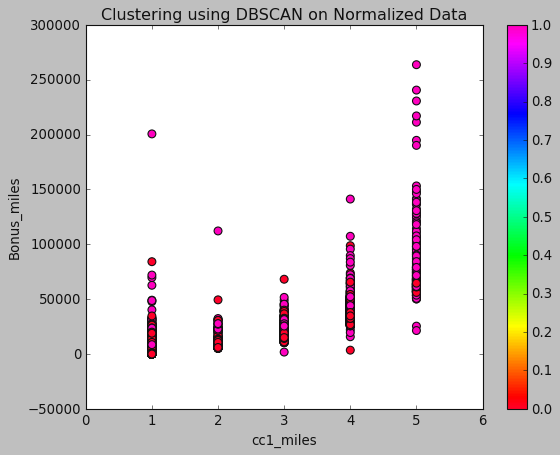

In [49]:
dfnorm.plot(x="cc1_miles",y="Bonus_miles",c=dbscan_norm.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Normalized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Normalized Data')

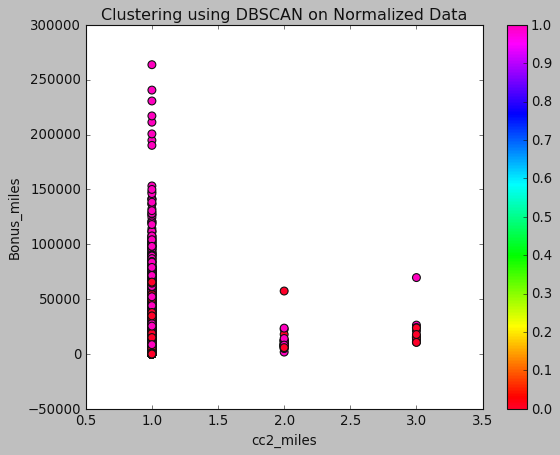

In [50]:
dfnorm.plot(x="cc2_miles",y="Bonus_miles",c=dbscan_norm.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Normalized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Normalized Data')

<Figure size 800x800 with 0 Axes>

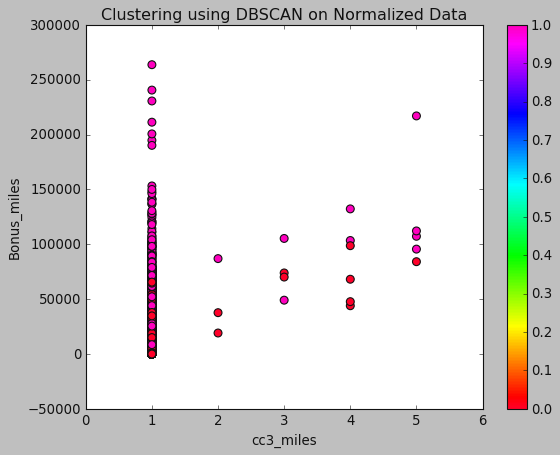

In [51]:
plt.figure(figsize=(10,10))
dfnorm.plot(x="cc3_miles",y="Bonus_miles",c=dbscan_norm.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Normalized Data')

#### Silhouette Score for DBSCAN is 0.56

### II. K-Means Clustering

In [52]:
model1 = KMeans(random_state=42)

In [53]:
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion')
# metric = 'distortion' uses "mean sum of squared distances to centers"

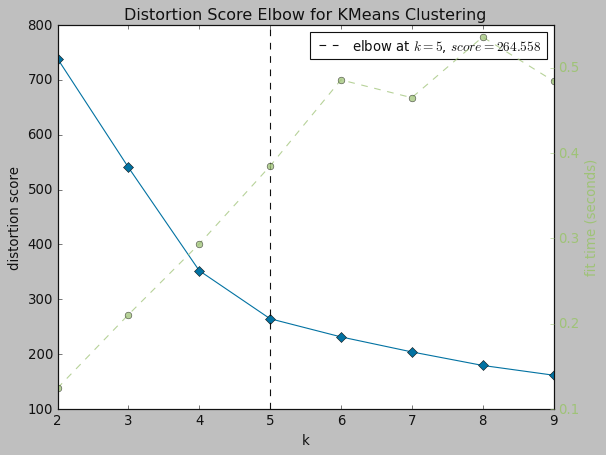

In [54]:
visualizer1.fit(pca_norm_df)    
visualizer1.poof()
plt.show()

In [55]:
k = list(range(2,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(fndf)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(fndf.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,fndf.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x246121974f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

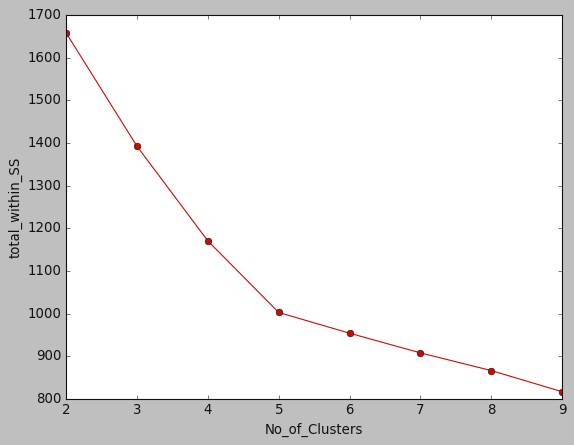

In [56]:
# Screw plot using code
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

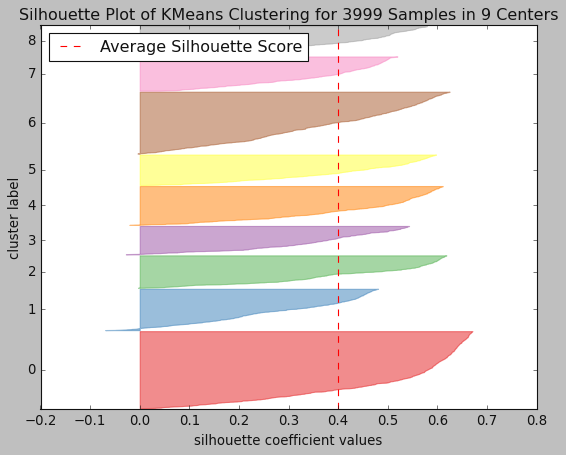

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [57]:
visualizer2 = SilhouetteVisualizer(model1,k=(2,10),metric='distortion')
visualizer2.fit(pca_norm_df)
visualizer2.poof()

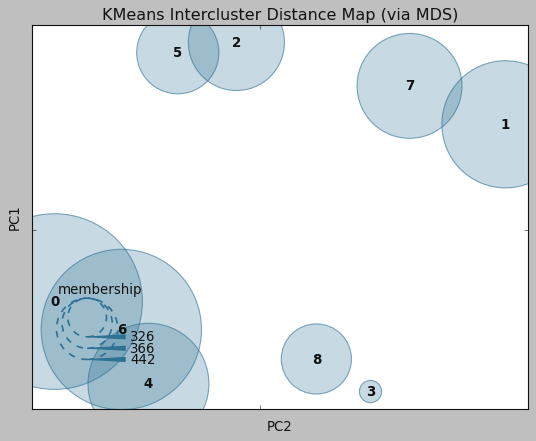

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [58]:
visualizer3=InterclusterDistance(model1,k=(2,10),metric='distortion')
visualizer3.fit(pca_norm_df)
visualizer3.show()

In [59]:
list1= [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(pca_norm_df)
    sil_score1= silhouette_score(pca_norm_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.5570574742349605
For n_clusters = 3 The average silhouette_score is : 0.495219312583889
For n_clusters = 4 The average silhouette_score is : 0.5101438480836274
For n_clusters = 5 The average silhouette_score is : 0.48731067512387616
For n_clusters = 6 The average silhouette_score is : 0.4529223752131931
For n_clusters = 7 The average silhouette_score is : 0.4408070061294246
For n_clusters = 8 The average silhouette_score is : 0.4324914844900429
For n_clusters = 9 The average silhouette_score is : 0.4000858512972626
For n_clusters = 10 The average silhouette_score is : 0.4061439933863938


#### Silhouette Score for K-Means is maximum at 0.51 thereby n_cluster = 4 is prominent although k = 5 is got from Elbow Visualizer.
(Ignoring n_cluster = 2)

In [60]:
cl = KMeans(n_clusters = 5)
y_kmeans = cl.fit_predict(pca_norm_df)
md=pd.Series(cl.labels_)  # converting numpy array into pandas series object 
Kdf = df.copy()
Kdf['KCluster']=md # creating a  new column and assigning it to new column 
Kdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KCluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


Text(0.5, 1.0, 'Clustering using K-Means on Normalized Data')

<Figure size 800x800 with 0 Axes>

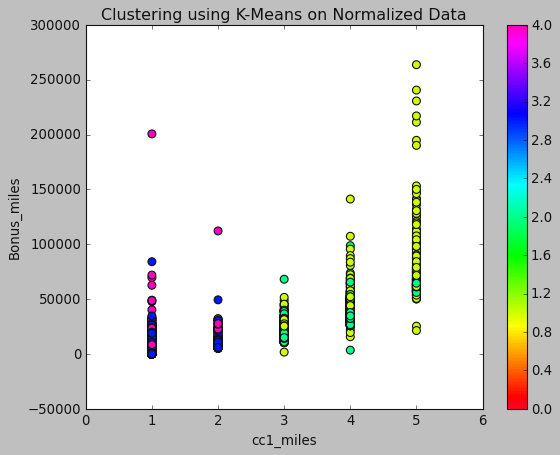

In [61]:
plt.figure(figsize=(10,10))
Kdf.plot(x="cc1_miles",y="Bonus_miles",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Normalized Data')

Text(0.5, 1.0, 'Clustering using K-Means on Normalized Data')

<Figure size 800x800 with 0 Axes>

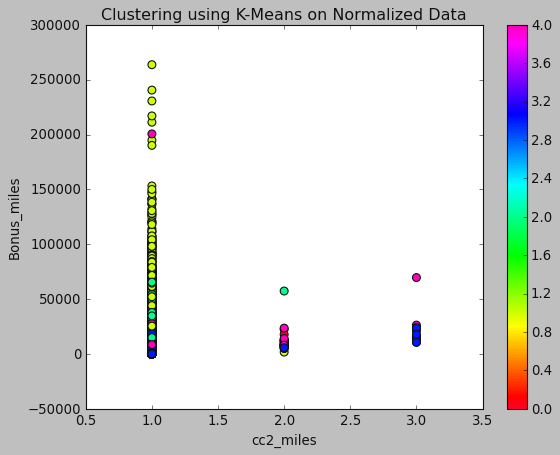

In [62]:
plt.figure(figsize=(10,10))
Kdf.plot(x="cc2_miles",y="Bonus_miles",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Normalized Data')

Text(0.5, 1.0, 'Clustering using K-Means on Normalized Data')

<Figure size 800x800 with 0 Axes>

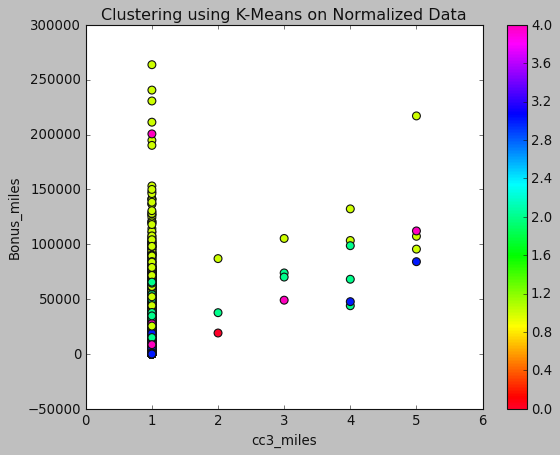

In [63]:
plt.figure(figsize=(10,10))
Kdf.plot(x="cc3_miles",y="Bonus_miles",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Normalized Data')

In [64]:
Kdf.iloc[:,:].groupby(Kdf.KCluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KCluster,,,,,,,,,,,
0,49947.915802,90.006920,1.122261,1.019608,1.001153,3465.412918,6.908881,244.115340,0.728950,5569.983852,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0
3,33091.529526,94.040658,1.070668,1.016457,1.006776,3246.130687,6.178122,212.644724,0.603098,1994.135528,0.0
4,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0


### III. H-Clustering (Dendrogram Logic)

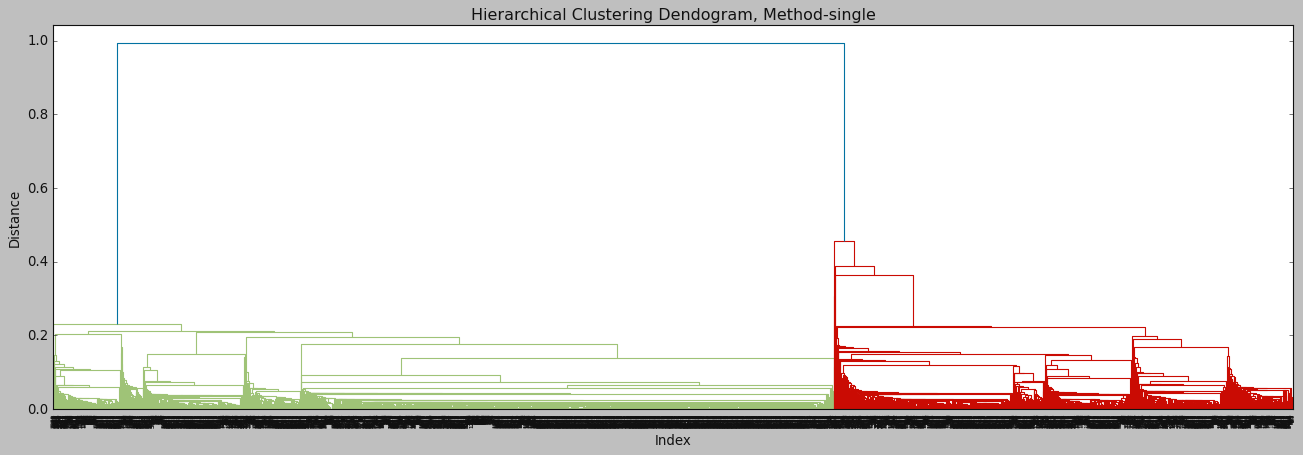

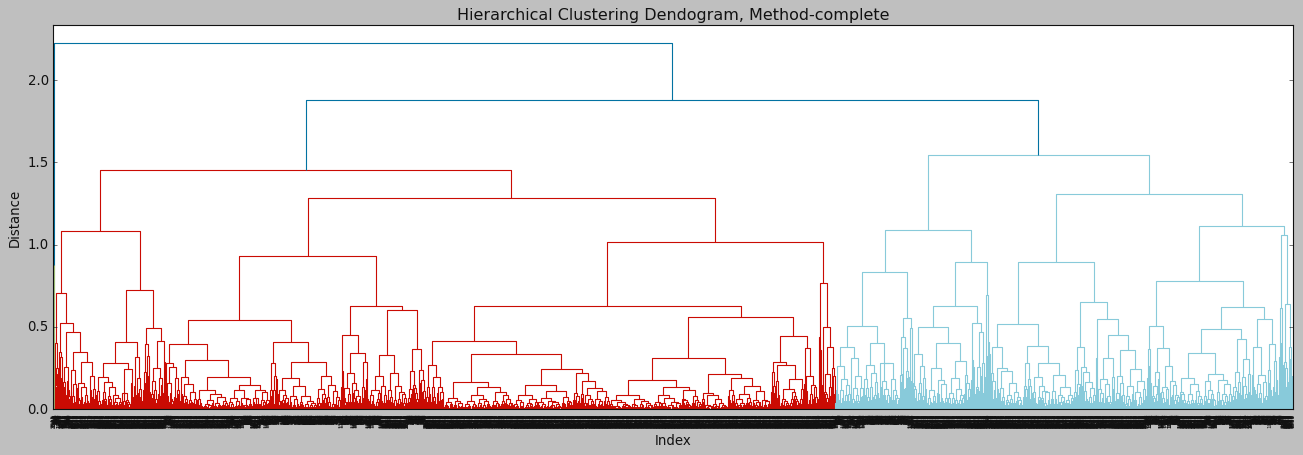

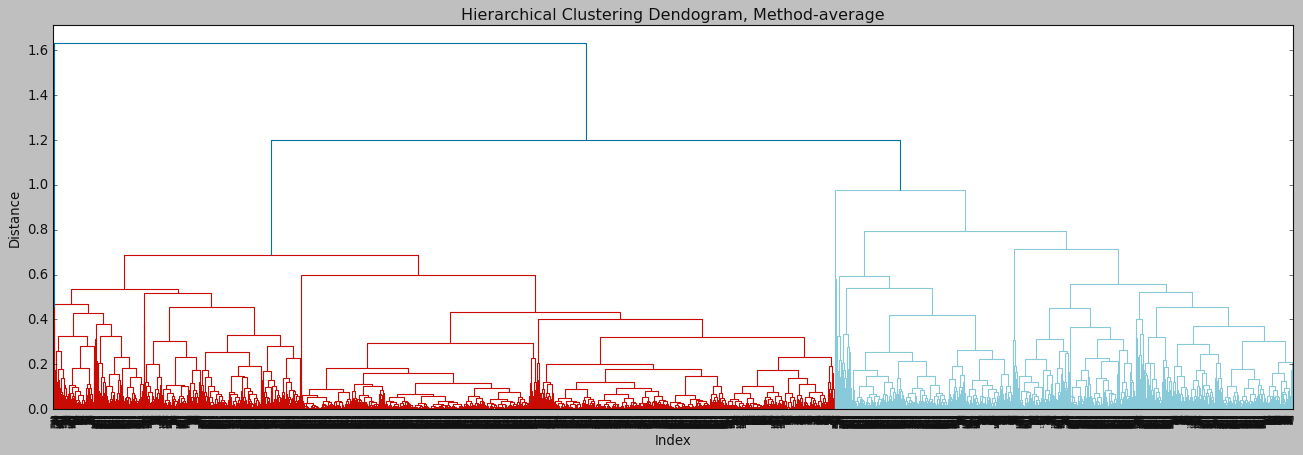

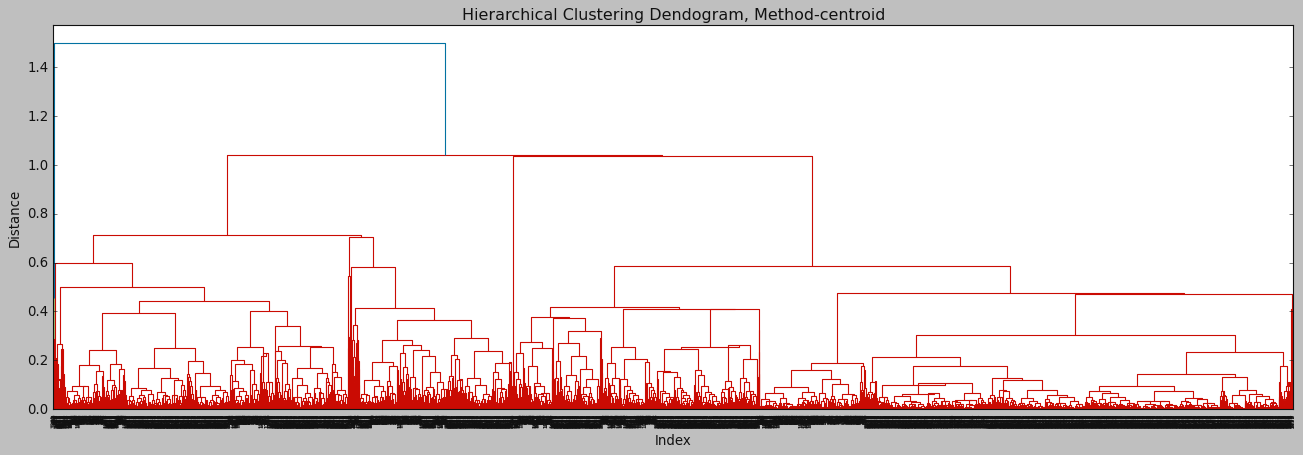

In [65]:
import scipy.cluster.hierarchy as sch
for methods in ['single','complete','average','centroid']:
    z = linkage(pca_norm_df,method=methods, metric = "euclidean")
    plt.figure(figsize=(20,6))
    plt.title('Hierarchical Clustering Dendogram, Method-{}'.format(methods))
    plt.xlabel('Index')
    plt.ylabel('Distance')
    sch.dendrogram(z)
    plt.show()

In [66]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(pca_norm_df)
        silhouette_score1 = silhouette_score(pca_norm_df, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.5570574742349605
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.45066420231385396
For n_clusters = 2 The average silhouette_score with linkage- average : 0.474703385149703
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5570574742349605

For n_clusters = 3 The average silhouette_score with linkage- single : 0.5558068847998208
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.552744613347034
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5545574774683505
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4668442861396812

For n_clusters = 4 The average silhouette_score with linkage- single : 0.5403713335204302
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5095308180476918
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4979760029410702
For 

#### with H-Clustering silhouette_score with linkage- single : 0.56, & cluster = 3

In [67]:
Hcluster = pd.Series(hie_cluster.labels_)
nHdf = df.copy()
nHdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [68]:
nHdf['HNormCluster'] = Hcluster
nHdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HNormCluster
0,28143,0,1,1,1,174,1,0,0,7000,0,7
1,19244,0,1,1,1,215,2,0,0,6968,0,7
2,41354,0,1,1,1,4123,4,0,0,7034,0,7
3,14776,0,1,1,1,500,1,0,0,6952,0,7
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


Text(0.5, 1.0, 'Clustering using H-Clustering on Normalized Data')

<Figure size 800x800 with 0 Axes>

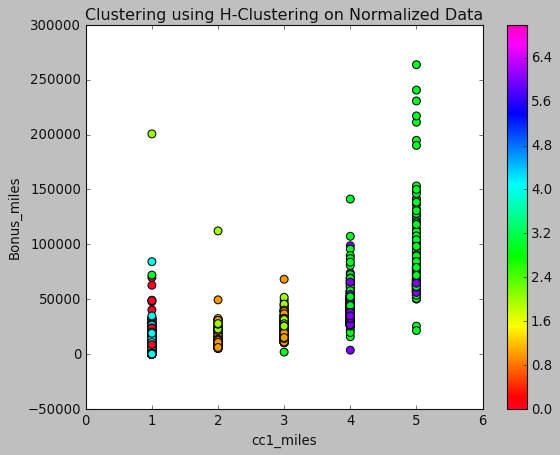

In [69]:
plt.figure(figsize=(10,10))
nHdf.plot(x="cc1_miles",y="Bonus_miles",c=hie_labels,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Normalized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Normalized Data')

<Figure size 800x800 with 0 Axes>

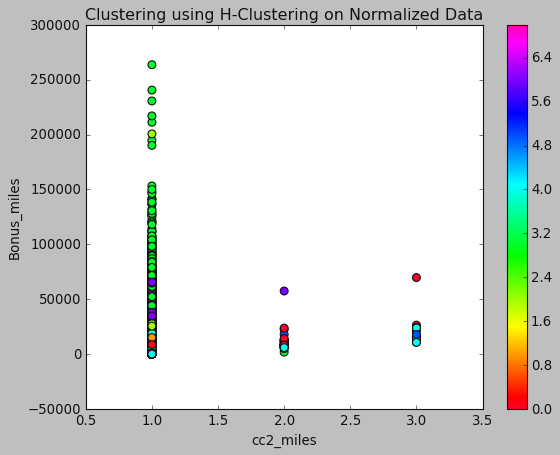

In [70]:
plt.figure(figsize=(10,10))
nHdf.plot(x="cc2_miles",y="Bonus_miles",c=hie_labels,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Normalized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Normalized Data')

<Figure size 800x800 with 0 Axes>

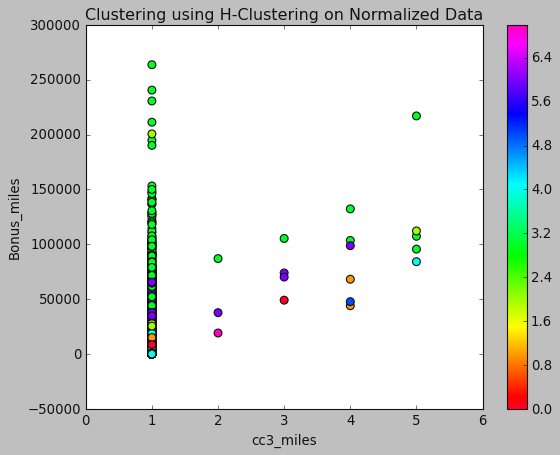

In [71]:
plt.figure(figsize=(10,10))
nHdf.plot(x="cc3_miles",y="Bonus_miles",c=hie_labels,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Normalized Data')

In [72]:
nHdf.iloc[:,:].groupby(nHdf.HNormCluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
HNormCluster,,,,,,,,,,,
0,86608.910211,323.531690,1.005282,1.036972,1.003521,7560.274648,9.369718,1090.880282,3.375000,4340.778169,1.0
1,85451.383858,81.326772,2.647638,1.000000,1.011811,15969.303150,15.336614,159.468504,0.456693,4197.210630,0.0
2,67783.350000,165.913158,2.726316,1.002632,1.010526,19185.871053,16.321053,338.605263,0.939474,4423.739474,1.0
3,129050.722326,204.348968,4.380863,1.001876,1.039400,58581.711069,22.232645,978.741088,2.956848,5071.545966,1.0
4,26259.689655,105.348112,1.000000,1.016420,1.006568,2777.300493,5.983580,247.719212,0.663383,1376.730706,0.0
5,41933.062500,86.256510,1.000000,1.026042,1.003906,2712.138021,5.658854,254.813802,0.795573,3882.291667,0.0
6,144377.249135,103.664360,4.249135,1.003460,1.027682,45344.314879,18.577855,268.339100,0.737024,4690.993080,0.0
7,50189.154070,54.965116,1.000000,1.011628,1.002907,2215.436047,5.441860,188.040698,0.531977,6722.363372,0.0


### 2. PCA on Standardized Data

In [73]:
pca_std = PCA(random_state=41, n_components=0.95)
pca_std_df= pca_std.fit_transform(fsdf)

In [74]:
cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.86764604, 45.57727277, 55.16521222, 64.340608  , 73.06971976,
       81.36208842, 88.69611851, 94.33759324, 97.61250085])

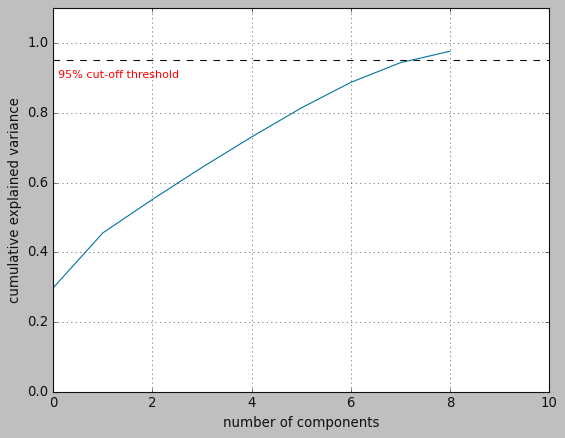

In [75]:
plt.plot(np.cumsum(pca_std.explained_variance_ratio_))
plt.ylim(0.0,1.1)
plt.xlim(0.0,10)
plt.xlabel('number of components')
plt.axhline(y=0.95, color='k', linestyle='--')
plt.text(0.1, 0.9, '95% cut-off threshold', color = 'red', fontsize=10)
plt.ylabel('cumulative explained variance')
plt.grid()

#### Here we get idea that PCA Components should be 7, however still we can analyze to get 95 % of variance

### I. DBSCAN on PCA of Standardized Data 

In [76]:
pcastd = pd.DataFrame(pca_std_df,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9'])
pcastd.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.466491,-0.067174,-0.802780,0.293779,0.117851,1.327669,-0.268634,-0.678271,0.361840
1,-1.450383,-0.063735,-0.751927,0.290300,0.096710,1.275684,-0.300362,-0.759303,0.292570
2,-1.209899,-0.133538,-0.764841,0.312399,0.107139,1.310701,-0.159680,-0.697060,0.179045
3,-1.507013,-0.061521,-0.754361,0.279895,0.099630,1.271411,-0.330197,-0.756102,0.384809
4,3.006608,-0.185511,-0.241210,0.343234,-0.559210,0.222111,-0.848909,-0.609173,-0.083886


In [77]:
dbscan_std = DBSCAN(eps=5,min_samples=10)
dbscan_std.fit(pcastd)

DBSCAN(eps=5, min_samples=10)

In [78]:
dbcluster_std = pd.DataFrame(dbscan_std.labels_,columns=['DBSCAN_Cluster'])
dbcluster_std.head()

,DBSCAN_Cluster
0,0
1,0
2,0
3,0
4,0


In [79]:
dfstd = pd.concat([df,dbcluster_std],axis=1)
dfstd.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,DBSCAN_Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [80]:
dbstd=dbscan_std.labels_

In [81]:
dfstd['DBSCAN_Cluster'].value_counts()

 0    3932
 2      28
-1      24
 1      15
Name: DBSCAN_Cluster, dtype: int64

In [82]:
silhouette_score(pcastd,dbstd)

0.5523756117270474

In [83]:
plt.style.use('classic')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

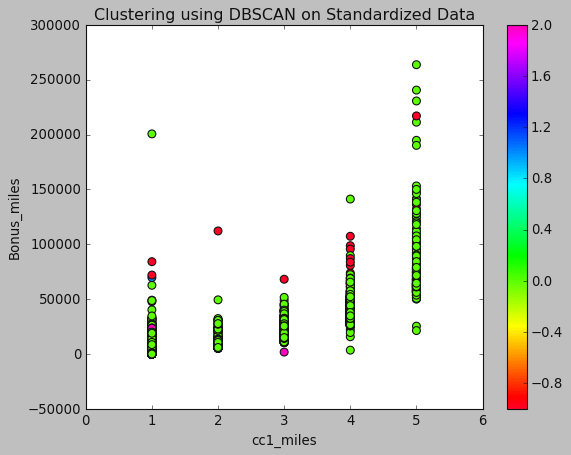

In [84]:
dfstd.plot(x="cc1_miles",y="Bonus_miles",c=dbscan_std.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

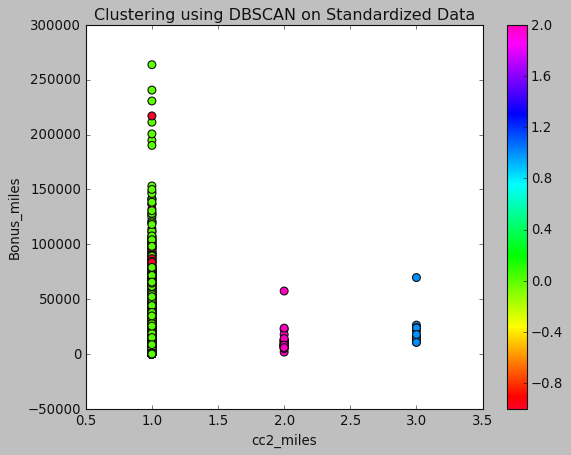

In [85]:
dfstd.plot(x="cc2_miles",y="Bonus_miles",c=dbscan_std.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

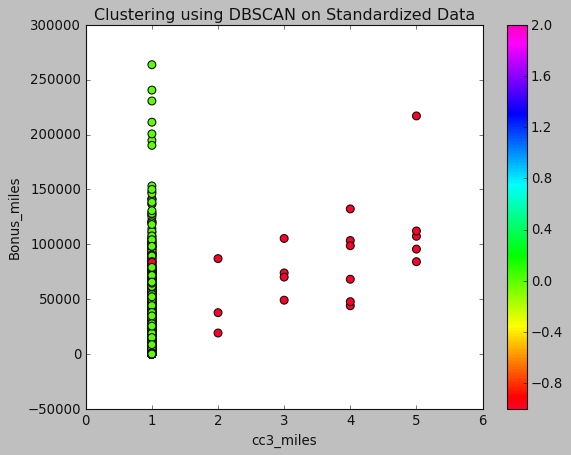

In [86]:
dfstd.plot(x="cc3_miles",y="Bonus_miles",c=dbscan_std.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

### II. K-Means on Standardized Data

In [87]:
model2 = KMeans(random_state=42)

In [88]:
visualizer4 = KElbowVisualizer(model2, k=(2,15),metric='distortion')

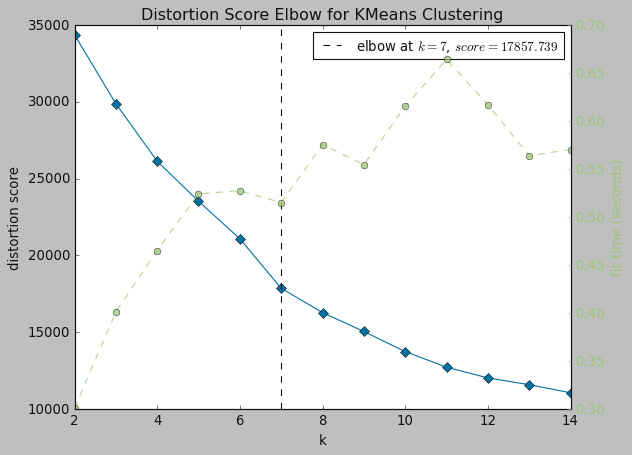

In [89]:
visualizer4.fit(pca_std_df)
visualizer4.poof()
plt.show()

In [90]:
k = list(range(2,15))
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(fsdf)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(fsdf.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,fsdf.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x246184b8af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

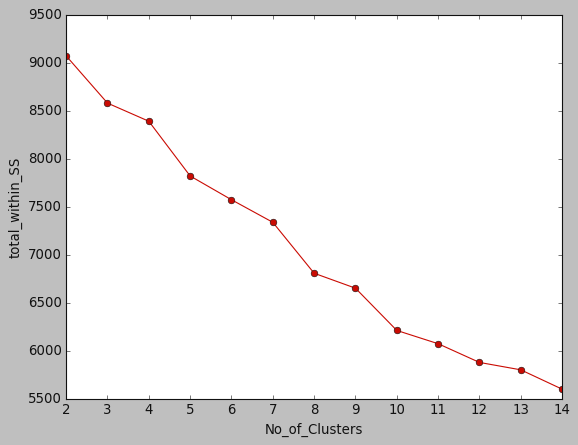

In [91]:
# Screw plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

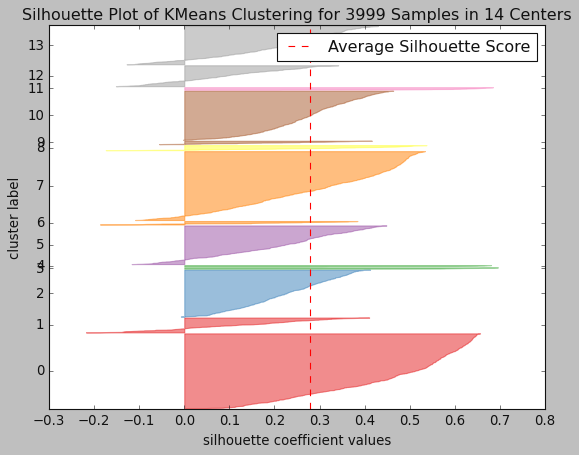

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3999 Samples in 14 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [92]:
visualizer5 = SilhouetteVisualizer(model2,k=(4,15))
visualizer5.fit(pca_std_df)
visualizer5.poof()

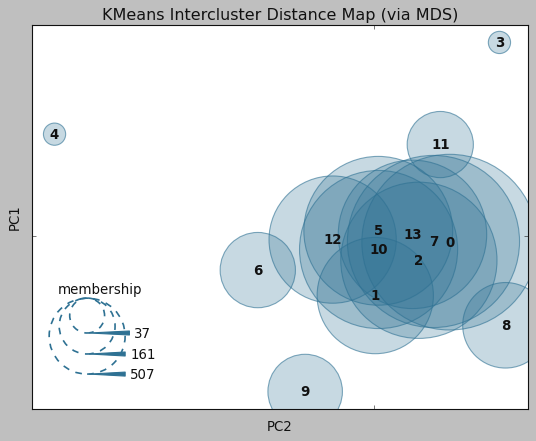

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [93]:
visualizer6=InterclusterDistance(model2,k=(2,15))
visualizer6.fit(pca_std_df)
visualizer6.show()

In [94]:
list1= [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in list1:
    clusterer2 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels2 = clusterer2.fit_predict(pca_std_df)
    sil_score2= silhouette_score(pca_std_df, cluster_labels2)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score2)

For n_clusters = 2 The average silhouette_score is : 0.3308749231539091
For n_clusters = 3 The average silhouette_score is : 0.31762273391059537
For n_clusters = 4 The average silhouette_score is : 0.3150077796733828
For n_clusters = 5 The average silhouette_score is : 0.32347662809351857
For n_clusters = 6 The average silhouette_score is : 0.2681452721363767
For n_clusters = 7 The average silhouette_score is : 0.2910665730637634
For n_clusters = 8 The average silhouette_score is : 0.24578916656239147
For n_clusters = 9 The average silhouette_score is : 0.30429783882031447
For n_clusters = 10 The average silhouette_score is : 0.2701670125178315
For n_clusters = 11 The average silhouette_score is : 0.27643448902566514
For n_clusters = 12 The average silhouette_score is : 0.28098350376699366
For n_clusters = 13 The average silhouette_score is : 0.2818348037066589
For n_clusters = 14 The average silhouette_score is : 0.2789901507642279
For n_clusters = 15 The average silhouette_score is :

#### For K-Means, silhouette_score is : 0.32 with n_clusters = 5, & k=7 in Elbow Curve

In [95]:
cl1 = KMeans(n_clusters = 7)
y_kmeans = cl1.fit_predict(pca_std_df)
md=pd.Series(cl1.labels_)  # converting numpy array into pandas series object 
K1df = df.copy()
K1df['KStdCluster']=md # creating a  new column and assigning it to new column 
K1df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KStdCluster
0,28143,0,1,1,1,174,1,0,0,7000,0,3
1,19244,0,1,1,1,215,2,0,0,6968,0,3
2,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,14776,0,1,1,1,500,1,0,0,6952,0,3
4,97752,0,4,1,1,43300,26,2077,4,6935,1,4


Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

<Figure size 800x800 with 0 Axes>

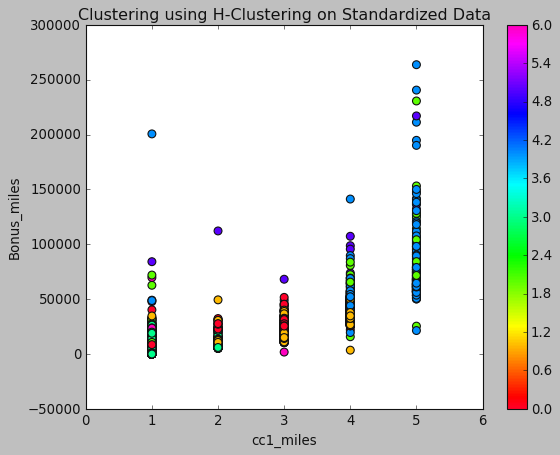

In [96]:
plt.figure(figsize=(10,10))
K1df.plot(x="cc1_miles",y="Bonus_miles",c=cl1.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

<Figure size 800x800 with 0 Axes>

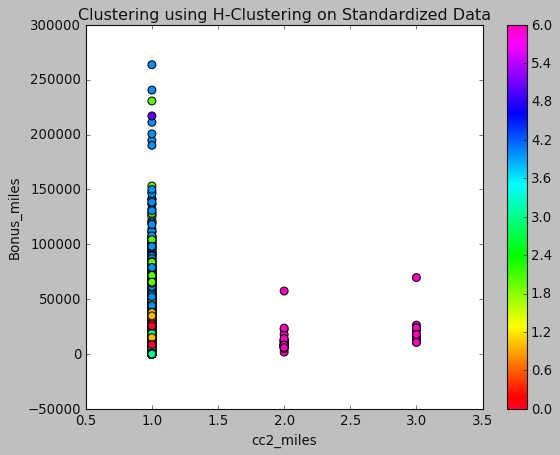

In [97]:
plt.figure(figsize=(10,10))
K1df.plot(x="cc2_miles",y="Bonus_miles",c=cl1.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

<Figure size 800x800 with 0 Axes>

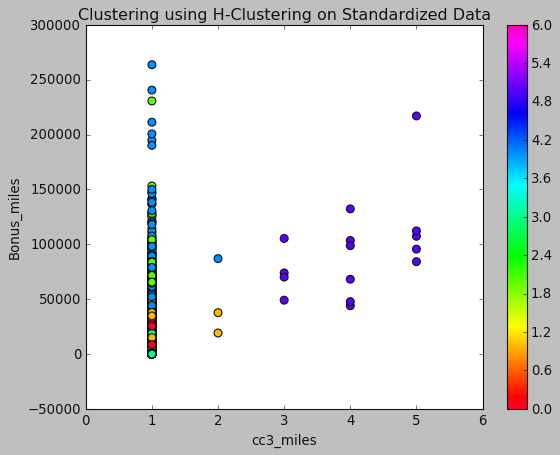

In [98]:
plt.figure(figsize=(10,10))
K1df.plot(x="cc3_miles",y="Bonus_miles",c=cl1.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

In [99]:
K1df.iloc[:,:].groupby(K1df.KStdCluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
KStdCluster,,,,,,,,,,,
0,58592.228029,216.286223,1.735154,1.000000,1.000000,11017.667458,10.748219,414.309976,1.274347,4253.321853,0.997625
1,95215.607789,73.228095,2.870654,1.000000,1.002782,21158.510431,17.086231,166.759388,0.495132,4533.070932,0.000000
2,201868.664122,835.328244,2.221374,1.000000,1.000000,33882.564885,28.076336,6019.870229,17.198473,4719.961832,0.809160
3,34934.102424,77.130909,1.041212,1.000000,1.000000,2371.569091,4.749697,165.960000,0.496970,3464.168485,0.000000
4,145940.489149,171.409015,4.342237,1.000000,1.001669,56227.227045,20.652755,460.641068,1.455760,5100.966611,0.851419
5,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
6,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


### III. H-Clustering

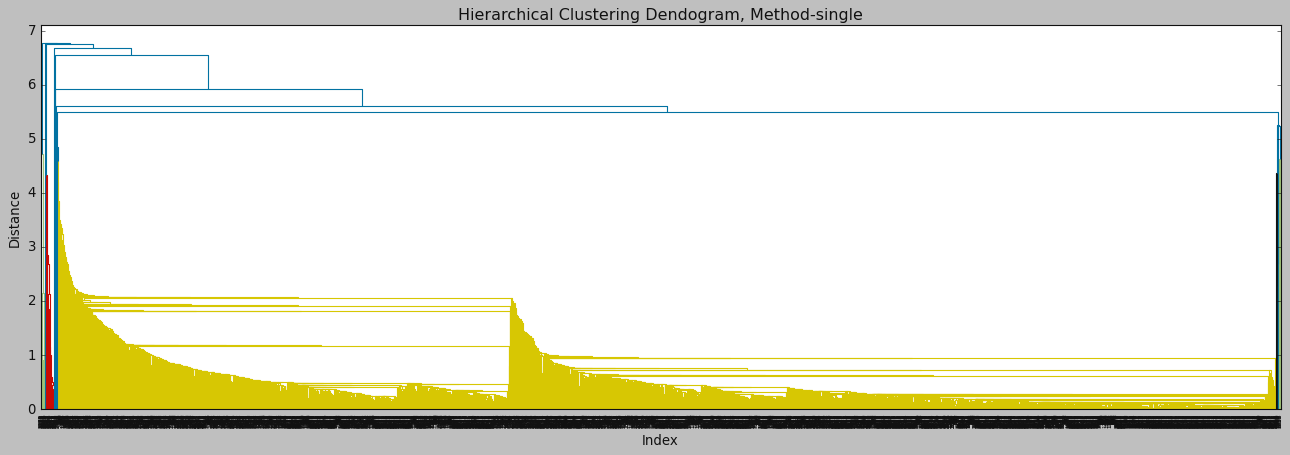

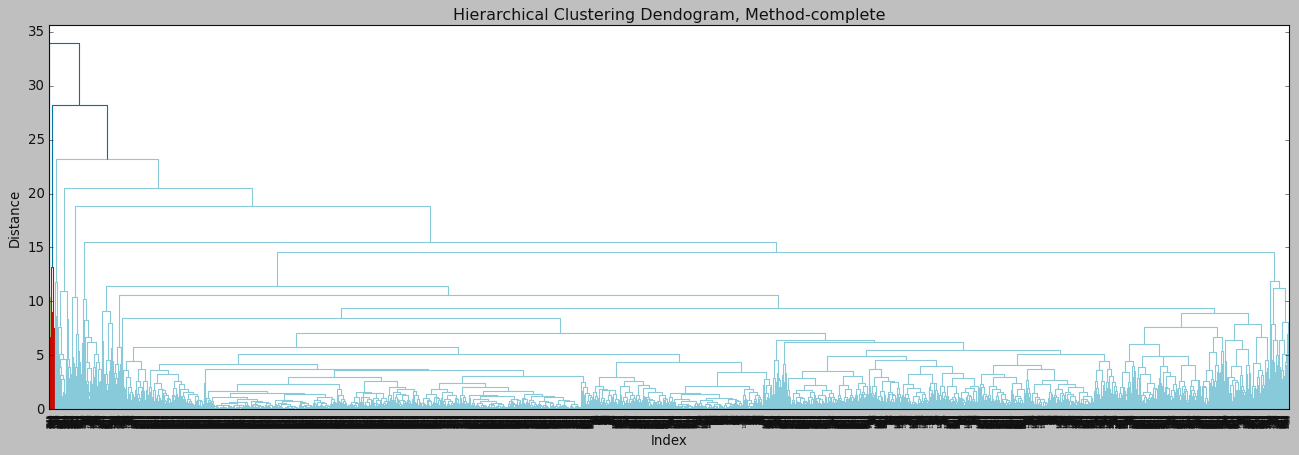

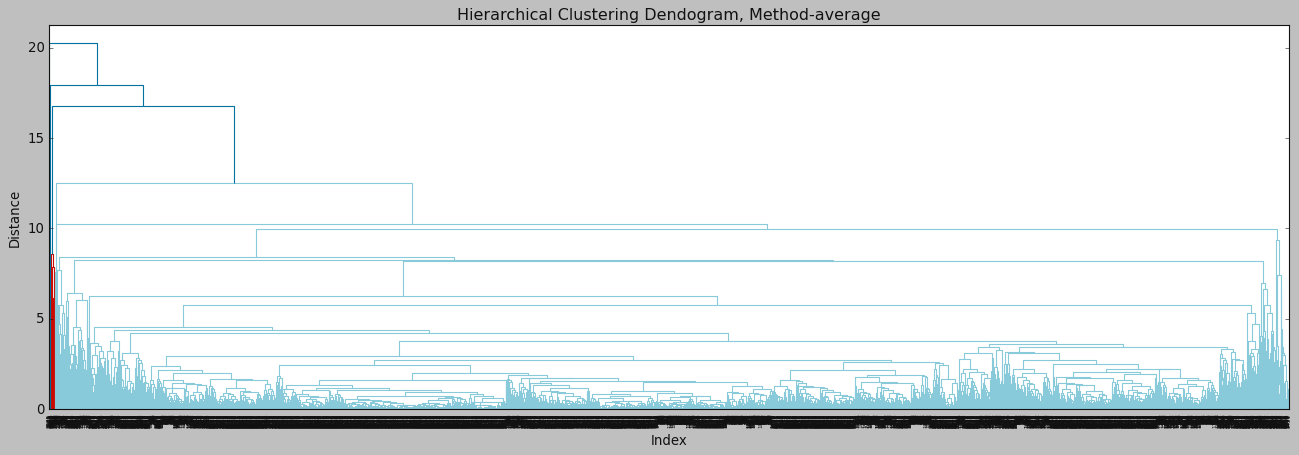

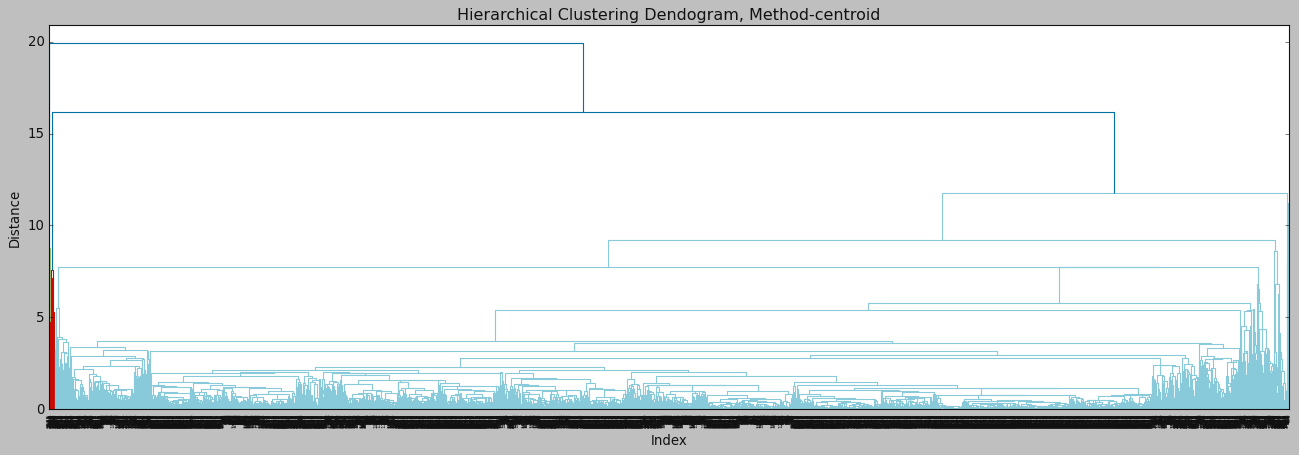

In [100]:
import scipy.cluster.hierarchy as sch
for methods in ['single','complete','average','centroid']:
    z = linkage(pca_std_df,method=methods, metric = "euclidean")
    plt.figure(figsize=(20,6))
    plt.title('Hierarchical Clustering Dendogram, Method-{}'.format(methods))
    plt.xlabel('Index')
    plt.ylabel('Distance')
    sch.dendrogram(z)
    plt.show()

In [101]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(pca_std_df)
        silhouette_score1 = silhouette_score(pca_std_df, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.738348693430478
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108872970217922
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108872970217922
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19974848194356637

For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380711786432554
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7784326687701901
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7858157031588869
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2111738156170414

For n_clusters = 4 The average silhouette_score with linkage- single : 0.5432817053419673
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685647808747991
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754755890058255
For

#### For n_clusters = 3 The average silhouette_score with linkage- average : 0.78 with H-Clustering of Standardized Data

In [102]:
Hcluster = pd.Series(hie_cluster2.labels_)
Hdf = df.copy()
Hdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [103]:
Hdf['HStdCluster'] = Hcluster
Hdf.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,HStdCluster
0,28143,0,1,1,1,174,1,0,0,7000,0,10
1,19244,0,1,1,1,215,2,0,0,6968,0,10
2,41354,0,1,1,1,4123,4,0,0,7034,0,10
3,14776,0,1,1,1,500,1,0,0,6952,0,10
4,97752,0,4,1,1,43300,26,2077,4,6935,1,7


Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

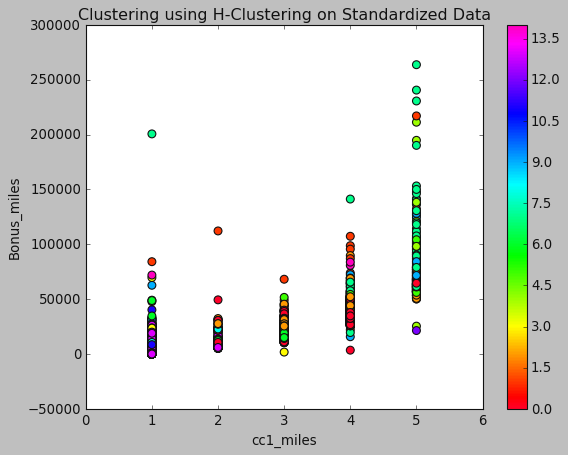

In [104]:
Hdf.plot(x="cc1_miles",y="Bonus_miles",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

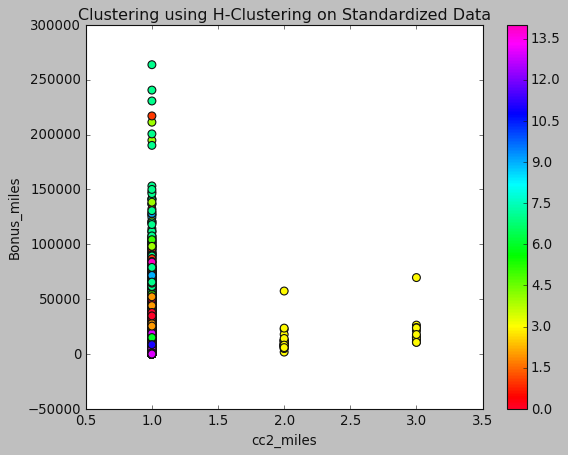

In [105]:
Hdf.plot(x="cc2_miles",y="Bonus_miles",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Clustering on Standardized Data')

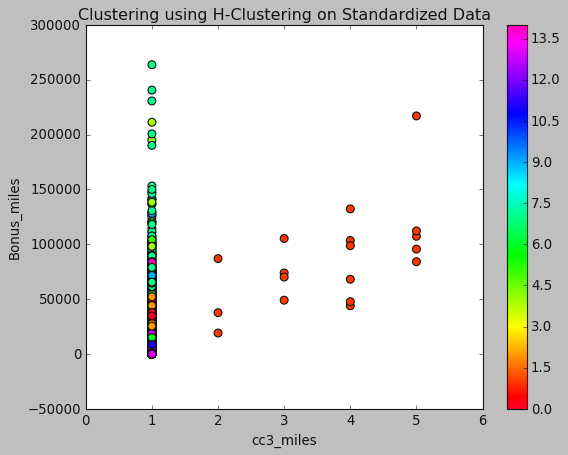

In [106]:
Hdf.plot(x="cc3_miles",y="Bonus_miles",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Clustering on Standardized Data')

In [107]:
Hdf.iloc[:,:].groupby(Hdf.HStdCluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
HStdCluster,,,,,,,,,,,
0,106691.116046,9.482808,3.249284,1.000000,1.000000,27320.199140,16.641834,185.707736,0.547278,4667.399713,0.000000
1,129951.388889,65.666667,3.388889,1.000000,3.722222,86259.888889,26.222222,422.222222,1.333333,4488.777778,0.500000
2,55797.561437,36.393195,3.224953,1.000000,1.000000,26836.943289,16.268431,170.952741,0.533081,4219.156900,1.000000
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,626516.283019,202.452830,3.698113,1.000000,1.000000,56755.566038,20.415094,948.886792,3.679245,6559.113208,0.792453
5,113225.728261,2460.934783,1.891304,1.000000,1.000000,18572.989130,11.543478,872.880435,2.706522,4216.641304,0.608696
6,35709.698895,4.143646,1.259669,1.000000,1.000000,5703.110497,16.383978,61.748619,0.193370,3041.372928,0.038674
7,123897.501873,59.329588,4.464419,1.000000,1.000000,66245.951311,24.352060,1014.719101,3.112360,5494.797753,0.988764
8,82556.378698,117.325444,1.035503,1.000000,1.000000,8169.911243,11.946746,2757.295858,8.047337,3710.431953,0.680473


In [ ]:
Saving to csv file

In [108]:
Hdf.to_csv("HdfStd.csv")

In [109]:
nHdf.to_csv("HdfNorm.csv")

In [110]:
K1df.to_csv("KdfStd.csv")

In [111]:
Kdf.to_csv("KdfNorm.csv")

In [113]:
dfnorm.to_csv("DdfNorm.csv")

In [115]:
dfstd.to_csv("DdfStd.csv")